<a href="https://www.kaggle.com/code/willirodrigues/laboratory?scriptVersionId=139328705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
my_data = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding = "ISO-8859-1")
my_data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
my_data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [4]:
my_data.select_dtypes(include='object').tail()

,state,month,date
6449,Tocantins,Dezembro,2012-01-01
6450,Tocantins,Dezembro,2013-01-01
6451,Tocantins,Dezembro,2014-01-01
6452,Tocantins,Dezembro,2015-01-01
6453,Tocantins,Dezembro,2016-01-01


In [5]:
my_data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [6]:
my_data = pd.DataFrame(my_data, columns = ['year', 'state', 'month', 'number', 'date'])
my_data['number'] = my_data['number'].astype(float).astype(int)
  
print(my_data.dtypes)
#Convertendo a Variavel/Coluna 'number' de float64 para int6

year       int64
state     object
month     object
number     int64
date      object
dtype: object


In [7]:
my_data.dtypes

year       int64
state     object
month     object
number     int64
date      object
dtype: object

In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    6454 non-null   int64 
 1   state   6454 non-null   object
 2   month   6454 non-null   object
 3   number  6454 non-null   int64 
 4   date    6454 non-null   object
dtypes: int64(2), object(3)
memory usage: 252.2+ KB


In [9]:
my_data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [10]:
my_data['date'].head().unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01'], dtype=object)

In [11]:
my_data['number'].nunique()

724

In [12]:
my_data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.235358
std,5.746654,190.843947
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [13]:
my_data[['state', 'number', 'year']].value_counts()

state        number  year
Rio          0       1998    17
Paraiba      0       1998    11
Sergipe      0       1998    10
Mato Grosso  0       1998    10
Acre         0       1999     8
                             ..
Maranhao     515     2007     1
             512     2006     1
             502     2008     1
             498     2013     1
Tocantins    989     2009     1
Length: 5416, dtype: int64

In [14]:
my_data.loc[0: 6: 2]

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
2,2000,Acre,Janeiro,0,2000-01-01
4,2002,Acre,Janeiro,0,2002-01-01
6,2004,Acre,Janeiro,0,2004-01-01


In [15]:
my_data.dropna(how = 'all', axis = 1)

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


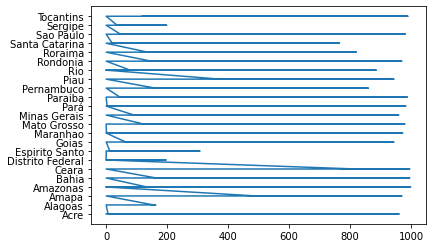

In [16]:
plt.plot (my_data['number'], my_data['state'])

In [17]:
# agrupando por, year, state, month
year_mo_state = my_data.groupby(by = ['year','state', 'month']).sum().reset_index()

year_mo_state.head()

,year,state,month,number
0,1998,Acre,Abril,0
1,1998,Acre,Agosto,130
2,1998,Acre,Dezembro,7
3,1998,Acre,Fevereiro,0
4,1998,Acre,Janeiro,0


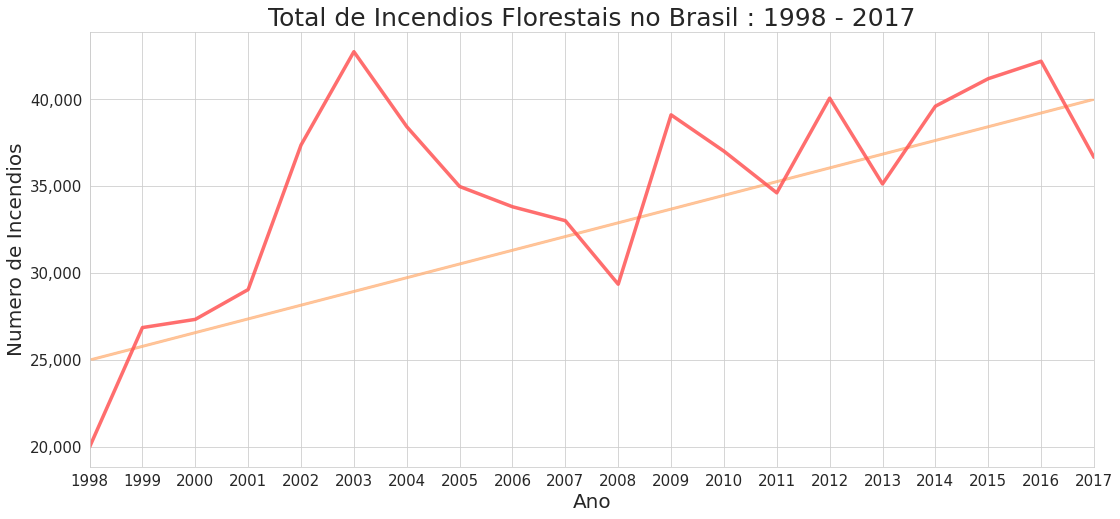

In [18]:
# Set up the defaults
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(18,8))

# criando plot
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state, estimator = 'sum', color = '#FF5555', 
                  lw = 3.5, err_style = None , alpha = 0.85)

# criando linha de tendecia
import pylab as p
p.arrow( 1998, 25000, 19, 15000, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 0.15, alpha = 0.7, shape = "full")

# config. do grafico
plt.title('Total de Incendios Florestais no Brasil : 1998 - 2017', fontsize = 25)
plt.xlabel('Ano', fontsize = 20)
plt.ylabel('Numero de Incendios', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))


A **tendecia** indica **crecimento** para os proximos anos que virão

In [19]:
pd.notnull(my_data)

,year,state,month,number,date
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
6449,True,True,True,True,True
6450,True,True,True,True,True
6451,True,True,True,True,True
6452,True,True,True,True,True


<AxesSubplot:xlabel='state'>

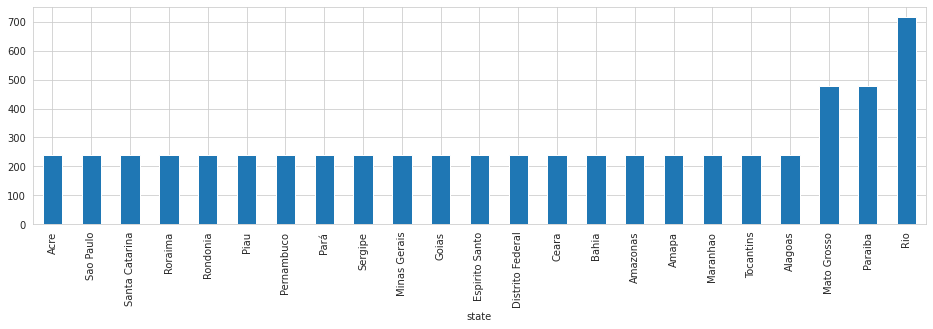

In [20]:
my_data.groupby(['state']).state.count().sort_values()[:].plot(kind = 'bar', figsize=(16,4))

In [21]:
max(my_data)

'year'

In [22]:
for i in my_data:
    print (i)

year
state
month
number
date


In [23]:
#my_list = [my_data]
#df = pd.DataFrame(my_list, columns = ['state'])
#print(df)
lista = my_data['state']
print (lista)

0            Acre
1            Acre
2            Acre
3            Acre
4            Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 6454, dtype: object


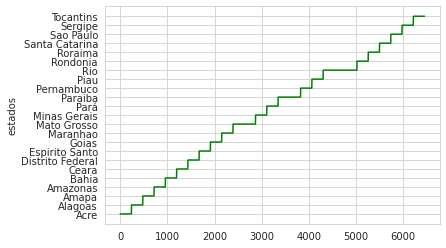

In [24]:
plt.plot(lista, color = 'green', data = my_data ['year'])
plt.ylabel('estados')
plt.show()

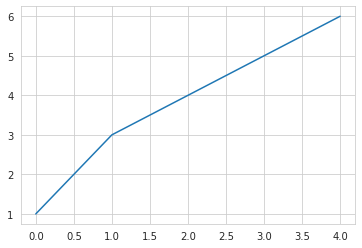

In [25]:
plt.plot([1, 3, 4, 5, 6], data = my_data['state'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='state', ylabel='number'>

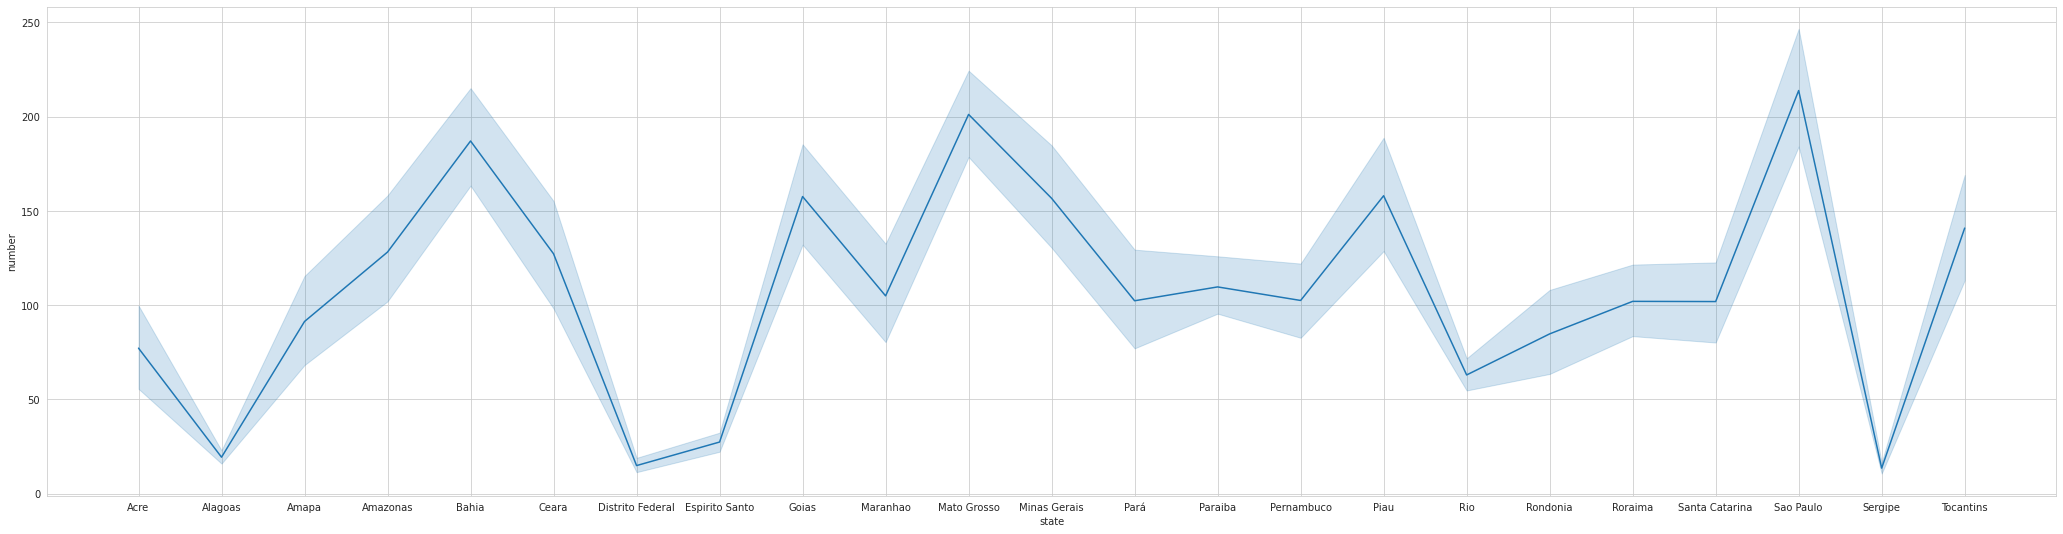

In [26]:
#a = my_data['year']
#b = my_data['state']
#c = my_data['month']
#d = my_data['number']
#e = my_data['date']



#my_data.plot('year', 'number')
plt.figure(figsize=(36,9))
sns.lineplot('state', 'number', data = my_data)

#plt.figure(figsize=(33,9))
#sns.jointplot(b, c)
#plt.show()

#sns.lineplot(), 1. A função considera a media do valor "x" de elementos com o mesmo valor. 
#                2. Ordena os valores.

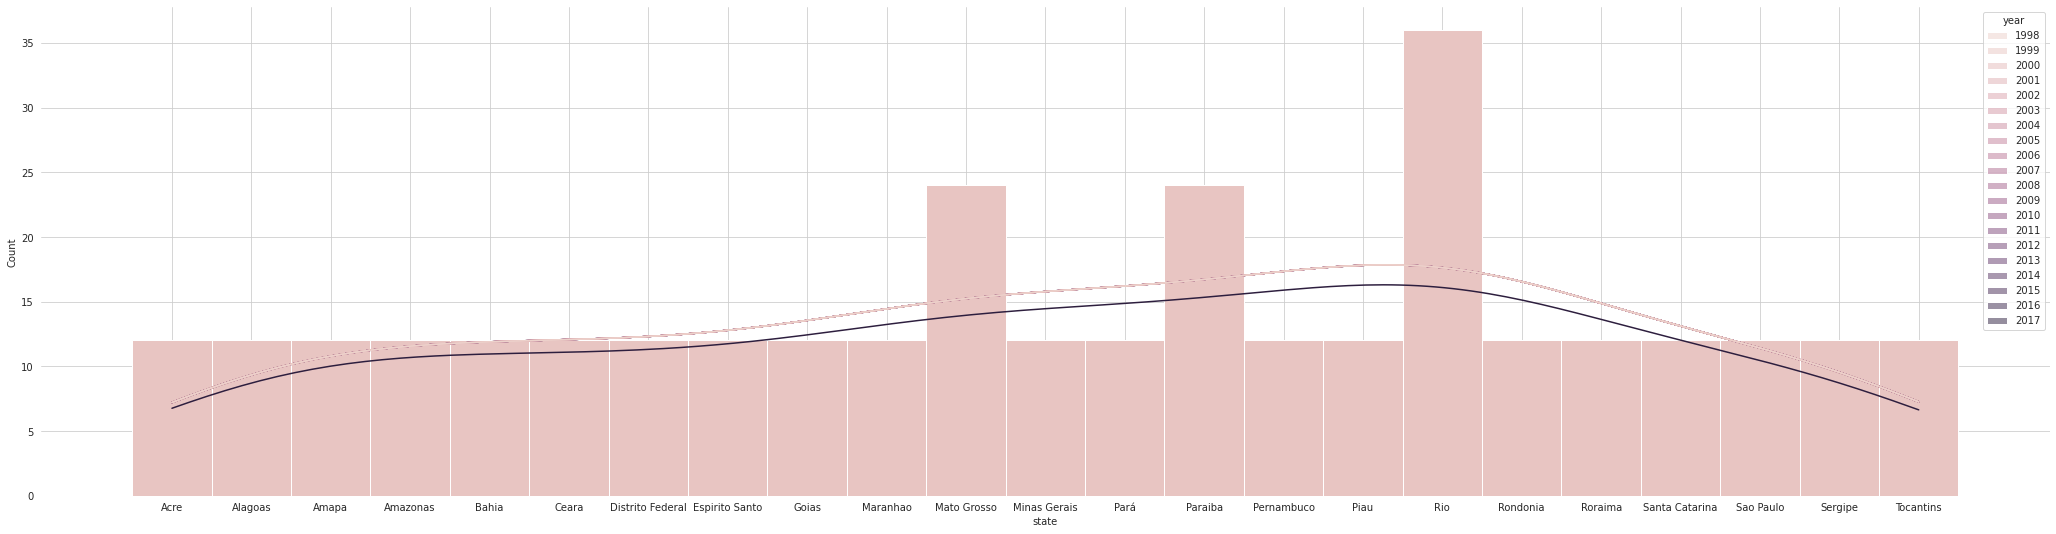

In [27]:
plt.figure(figsize=(36,9))
sns.set_style("whitegrid")
sns.histplot(data = my_data, x='state', kde = True, hue = 'year')
sns.despine(left=True, bottom=True)

#Também podemos visualizar a distribuição da massa corporal para várias espécies em uma única parcela. 
#O parâmetro hue mapeia a variável semântica 'espécie'. 

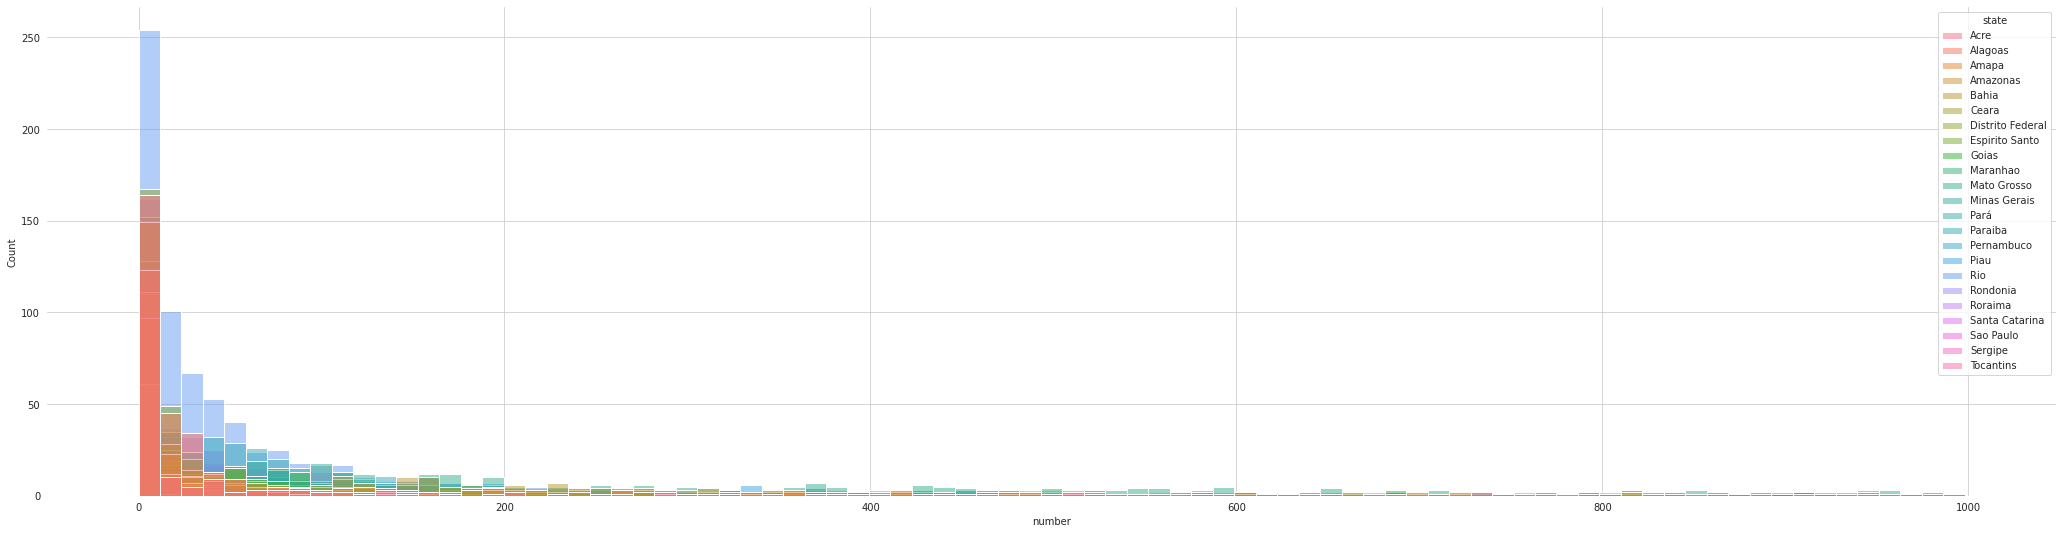

In [28]:
plt.figure(figsize=(36,9))
sns.set_style("whitegrid")
sns.histplot(data = my_data, x='number', hue = 'state')
sns.despine(left=True, bottom=True)

#ValueError: `stat` must be one of ['count', 'frequency', 'density', 'probability', 'proportion', 'percent'], but year was passed.`


In [29]:
my_data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


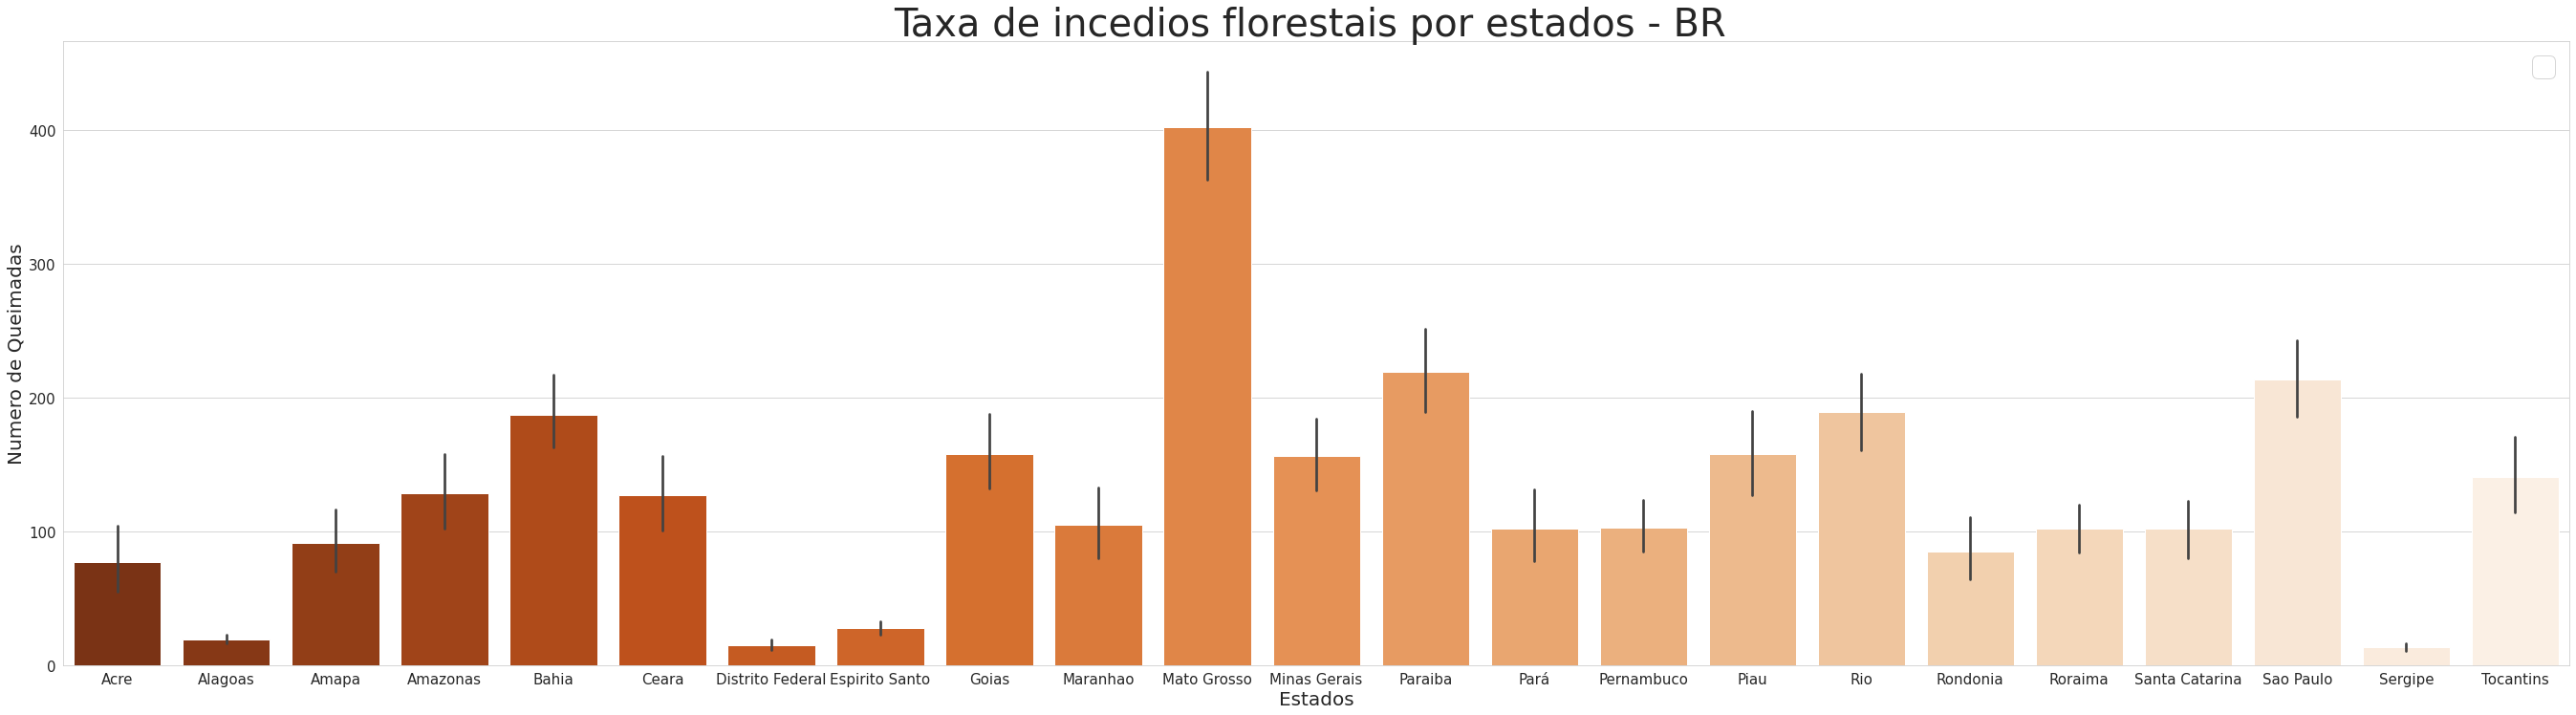

In [30]:
plt.figure(figsize = (47, 12))

sns.barplot(x = 'state', y = 'number', data = year_mo_state, palette = "Oranges_r")
            
plt.title("Taxa de incedios florestais por estados - BR ", fontsize = 40)
plt.xlabel("Estados", fontsize = 20)
plt.ylabel("Numero de Queimadas", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize =30)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

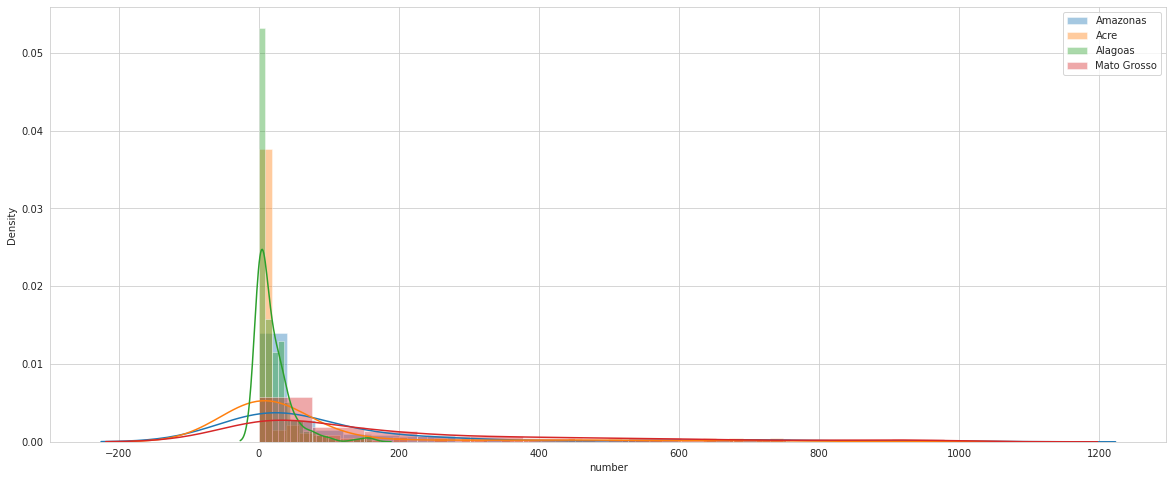

In [31]:
plt.figure(figsize=(20,8))
sns.distplot(my_data[my_data['state'] == 'Amazonas'] ['number'].dropna(), label='Amazonas', kde=True)
sns.distplot(my_data[my_data['state'] == 'Acre'] ['number'].dropna(), label='Acre', kde=True)
sns.distplot(my_data[my_data['state'] == 'Alagoas'] ['number'].dropna(), label='Alagoas', kde=True)
sns.distplot(my_data[my_data['state'] == 'Mato Grosso'] ['number'].dropna(), label='Mato Grosso', kde=True)
plt.legend()

Text(0, 0.5, 'Numero de Queimadas')

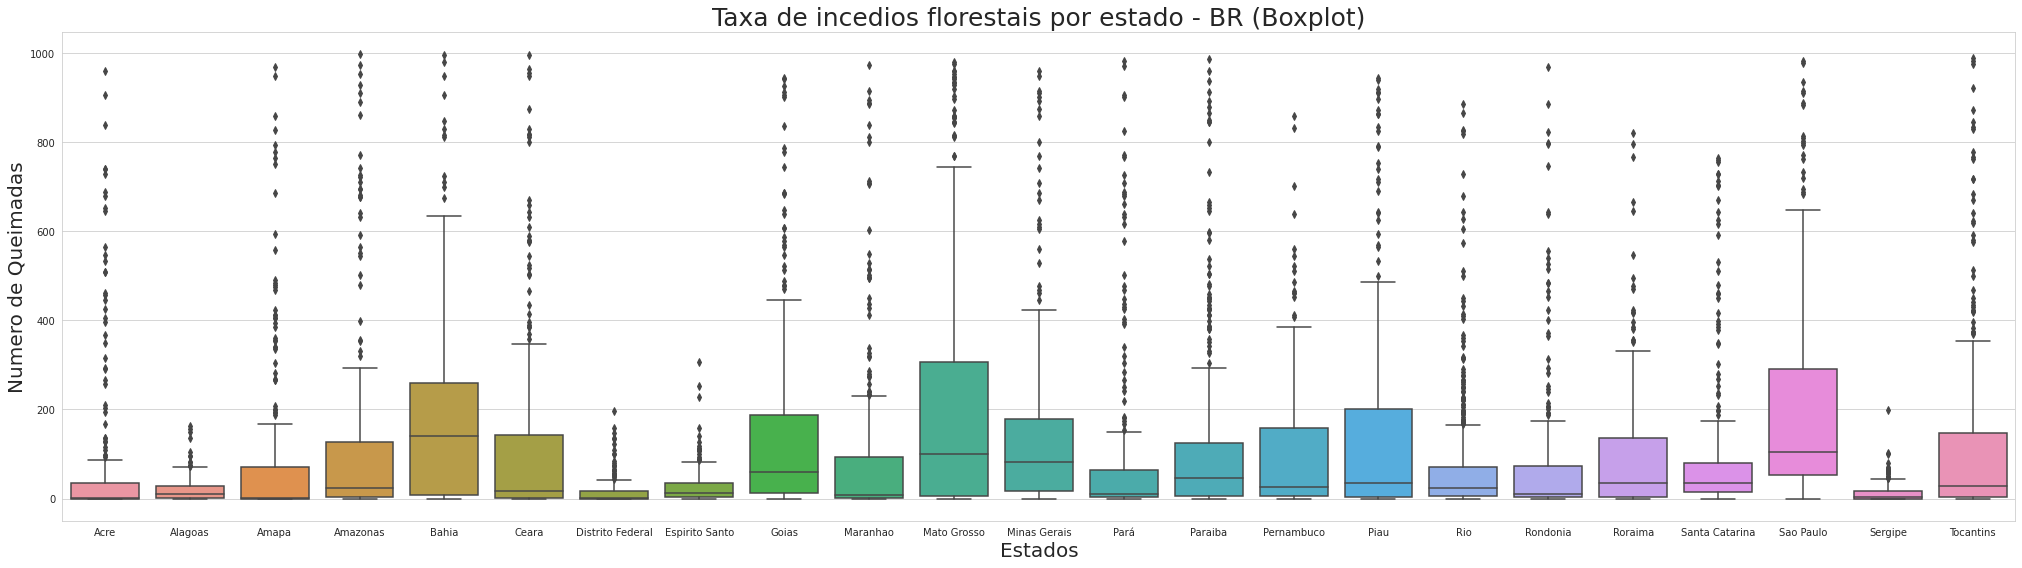

In [32]:
plt.figure(figsize=(35,9))
sns.boxplot(x="state", y="number", data=my_data)
plt.title("Taxa de incedios florestais por estado - BR (Boxplot)", fontsize = 25)
plt.xlabel("Estados", fontsize = 20)
plt.ylabel("Numero de Queimadas", fontsize = 20)

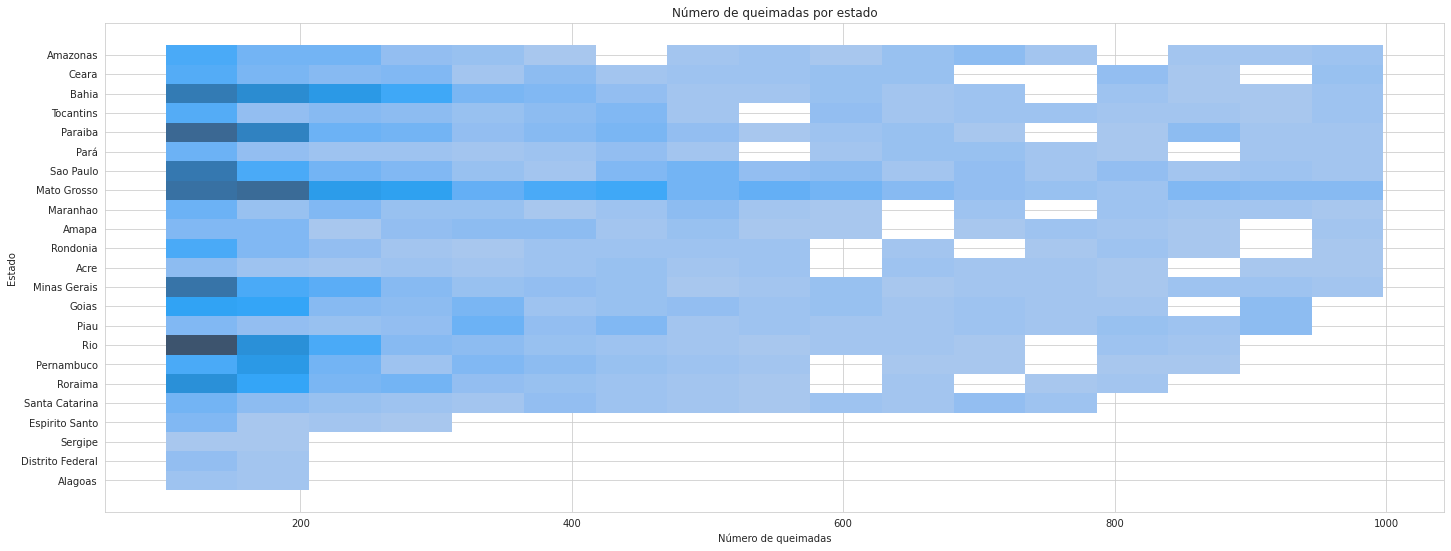

In [33]:
#Desenhando o grafico
plt.figure(figsize=(24,9))

# Agrupa os dados por ano
incendios_por_ano = my_data.groupby('year')

# Filtra os dados para incluir apenas registros com número de incêndios acima de 100
incendios_filtrados = my_data[my_data['number'] > 100].sort_values(by='number', ascending=False)

# Cria uma paleta de cores que varia de leve a escura
palette = sns.color_palette("Blues_r", len(incendios_filtrados))

# Cria um histograma dos dados filtrados usando seaborn
sns.histplot(
    data=incendios_filtrados,
    x='number', 
    y='state',
    palette=palette,
    stat='count', 
    kde=True
)

plt.title('Número de queimadas por estado')
plt.ylabel('Estado')
plt.xlabel('Número de queimadas')

plt.show()

<AxesSubplot:xlabel='number', ylabel='state'>

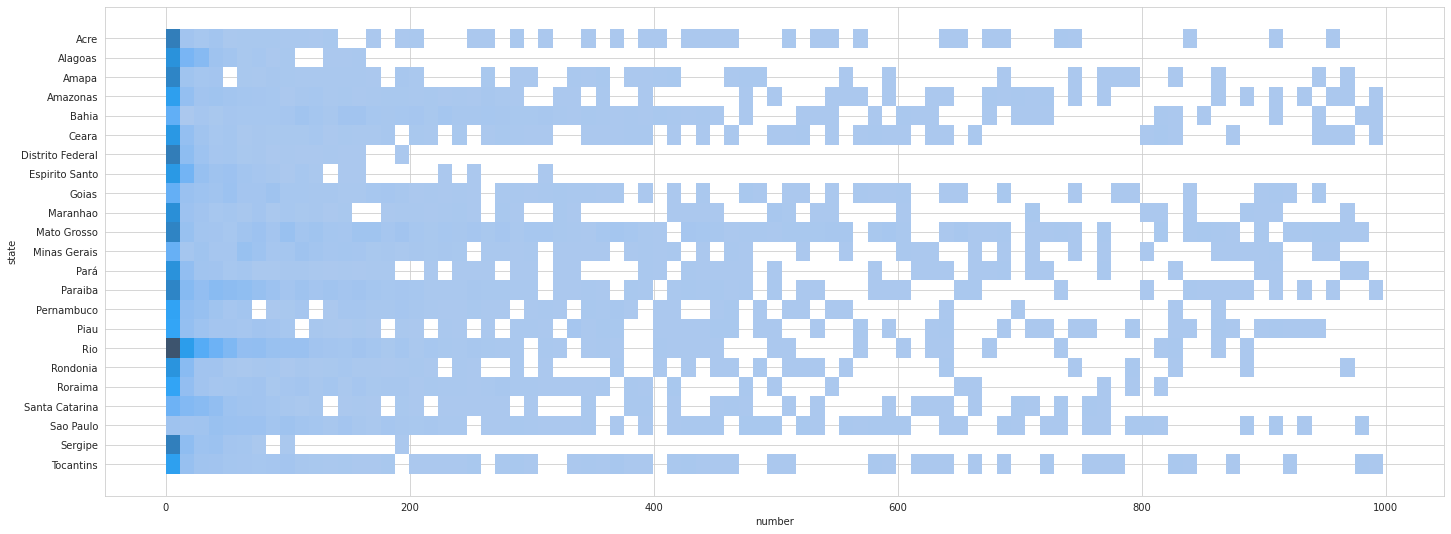

In [34]:
plt.figure(figsize=(24,9))
grouped_my_data = my_data.groupby('year')
filter_data = my_data ['number'] > 250
sns.histplot(data = my_data, x = my_data['number'], y = my_data['state'], stat = 'count', kde = True)

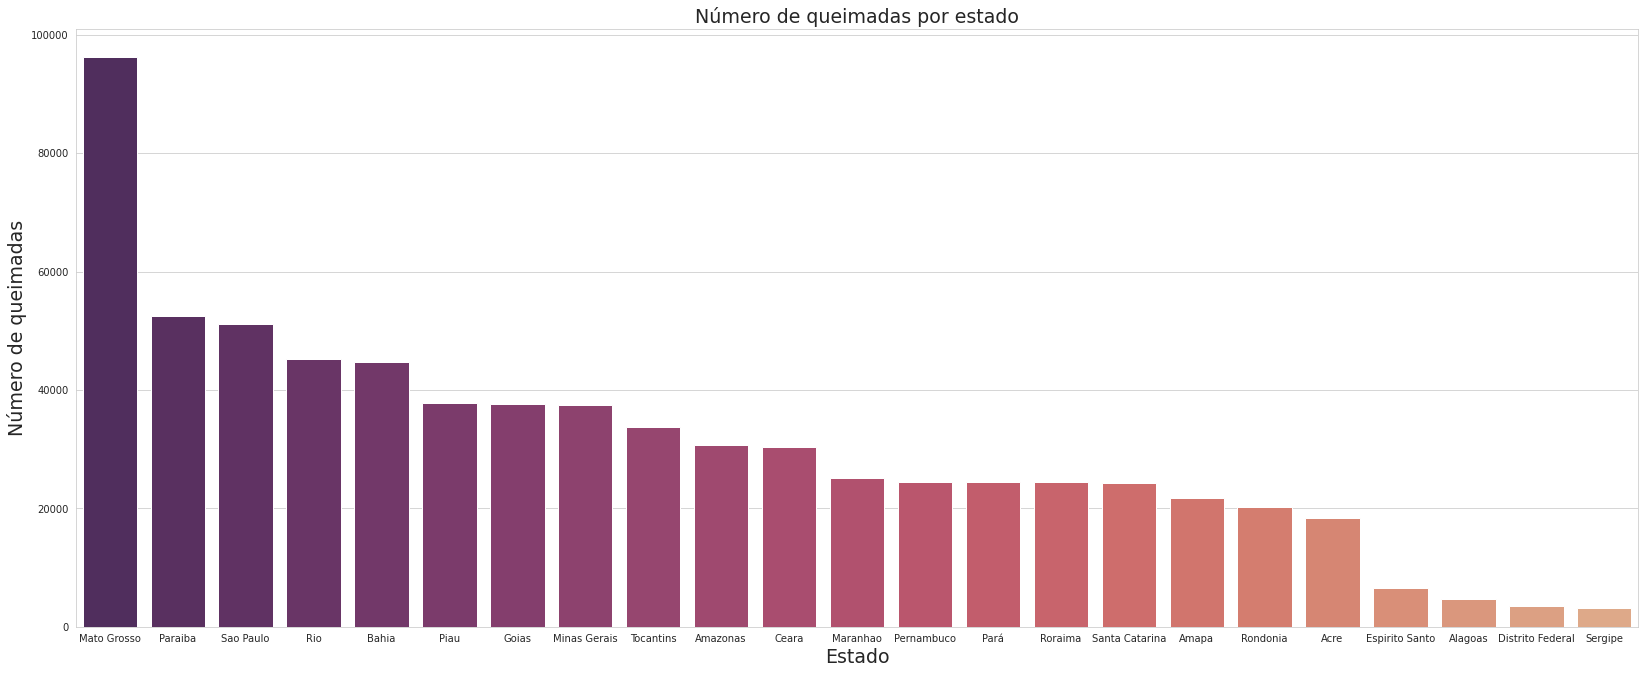

In [35]:
plt.figure(figsize=(28,11))

# Agrupa os dados por estado e calcula o número total de queimadas para cada estado
incendios_por_estado = my_data.groupby('state')['number'].sum().reset_index()

# Filtra os estados com mais de 100 queimadas
incendios_filtrados = incendios_por_estado[incendios_por_estado['number'] > 100].sort_values(by='number', ascending=False)

# Cria uma paleta de cores que varia de leve a escura
palette = list(reversed(sns.color_palette("flare", n_colors=len(incendios_filtrados))))

# Cria o gráfico de barras e atribui a cor a cada barra de acordo com o número de queimadas
sns.barplot(
    data=incendios_filtrados,
    x='state',
    y='number',
    palette=palette
)

plt.title('Número de queimadas por estado', fontsize = 19)
plt.xlabel('Estado', fontsize = 19)
plt.ylabel('Número de queimadas', fontsize = 19)
plt.show()


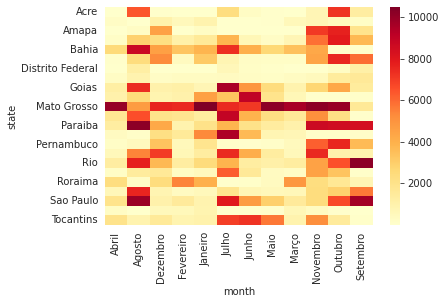

In [36]:
# Cria uma tabela dinâmica com os dados de número de incêndios por estado e mês
table = my_data.pivot_table(index='state', columns='month', values='number', aggfunc='sum')

# Plota o heatmap com a tabela dinâmica
sns.heatmap(table, cmap='YlOrRd')

# Exibe o gráfico
plt.show()


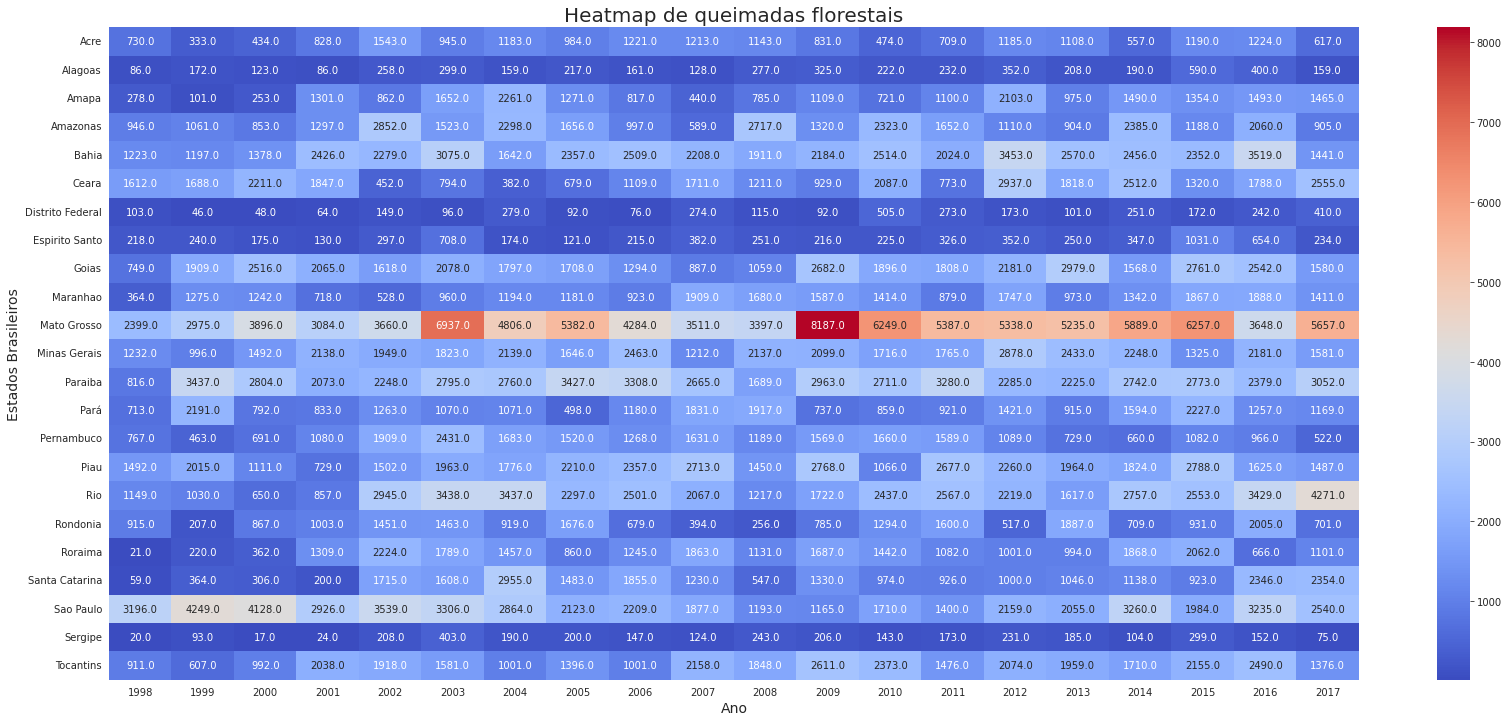

In [37]:
#Desenhando o mapa
plt.figure(figsize=(28,12))

#Agrupamento por ano
grouped_my_data = my_data.groupby('year')

# Cria uma tabela dinâmica com os dados de número de incêndios por estado e mês
table = my_data.pivot_table(index='state', columns='year', values='number', aggfunc='sum')

# Plota o heatmap com a tabela dinâmica, annot=True (plota os numeros), fmt=".1f (formata para flot)". Cor utilizanda padrão: YlOrRd
sns.heatmap(table, cmap='coolwarm', annot=True, fmt=".1f")

plt.title('Heatmap de queimadas florestais', fontdict = {'fontsize': 20})
plt.xlabel('Ano', fontdict = {'fontsize': 14})
plt.ylabel('Estados Brasileiros', fontdict = {'fontsize': 14})
plt.show()

# Exibe o gráfico
plt.show()

In [38]:
my_data ['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [39]:
grouped_my_data = my_data.groupby('year')
grouped_my_data.median()
#verificando a mediana por ano, utilizando "year".

,number
year,
1998,1.0
1999,14.0
2000,15.0
2001,11.5
2002,18.5
2003,27.0
2004,22.5
2005,25.0
2006,23.0


In [40]:
grouped_my_data.describe()

number                                                        
      count        mean         std  min   25%   50%     75%    max
year                                                               
1998  324.0   61.725309  148.995382  0.0  0.00   1.0   37.00  875.0
1999  324.0   82.929012  179.311733  0.0  2.00  14.0   58.50  982.0
2000  324.0   84.385802  179.294306  0.0  2.00  15.0   60.50  925.0
2001  324.0   89.679012  176.541689  0.0  2.00  11.5   76.00  979.0
2002  324.0  115.336420  200.965228  0.0  3.00  18.5  121.25  976.0
2003  324.0  131.904321  218.033443  0.0  3.00  27.0  153.50  977.0
2004  324.0  118.601852  203.325843  0.0  3.00  22.5  143.25  960.0
2005  324.0  107.975309  178.001738  0.0  4.00  25.0  137.00  948.0
2006  324.0  104.379630  191.076438  0.0  2.00  23.0   97.50  995.0
2007  324.0  101.904321  193.833592  0.0  2.75  15.0   95.25  982.0
2008  324.0   90.626543  171.848156  0.0  2.00  25.0   83.25  998.0
2009  324.0  120.691358  206.318933  0.0  3.00  29.0  125.75  989.0
2010  324.0  114.243827  184.009992  0.0  4.00  32.5  130.00  941.0
2011  324.0  106.848765  177.607471  0.0  3.00  31.0  119.50  974.0
2012  324.0  123.657407  200.535869  0.0  7.00  41.0  142.50  995.0
2013  324.0  108.425926  173.286384  0.0  4.75  36.5  121.25  956.0
2014  324.0  122.225309  189.860928  0.0  6.00  46.5  144.00  952.0
2015  324.0  127.111111  200.295664  0.0  6.00  44.5  147.25  960.0
2016  324.0  130.212963  203.291554  0.0  4.00  42.0  154.25  969.0
2017  298.0  123.030201  216.786437  0.0  4.00  31.5  118.50  987.0

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='state', ylabel='number'>

<Figure size 2376x648 with 0 Axes>

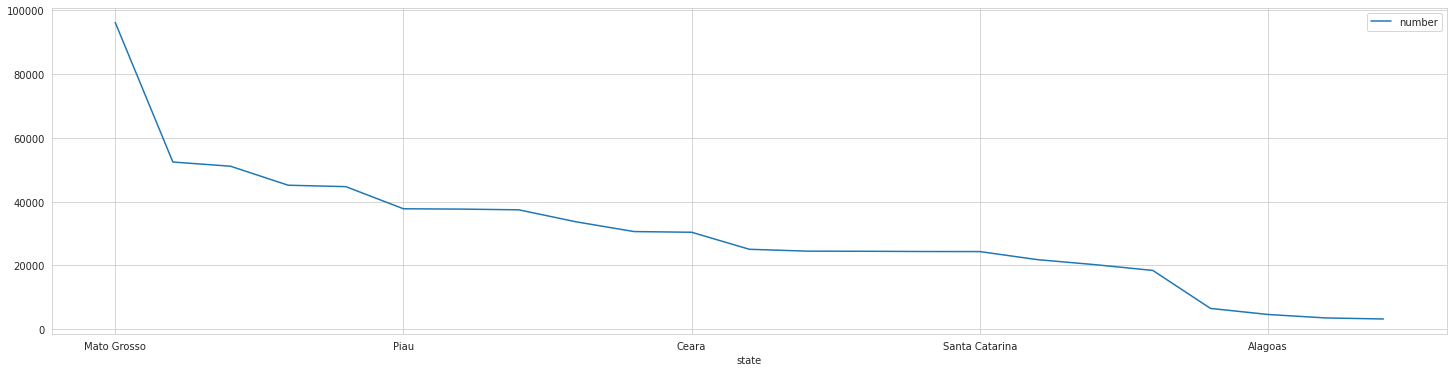

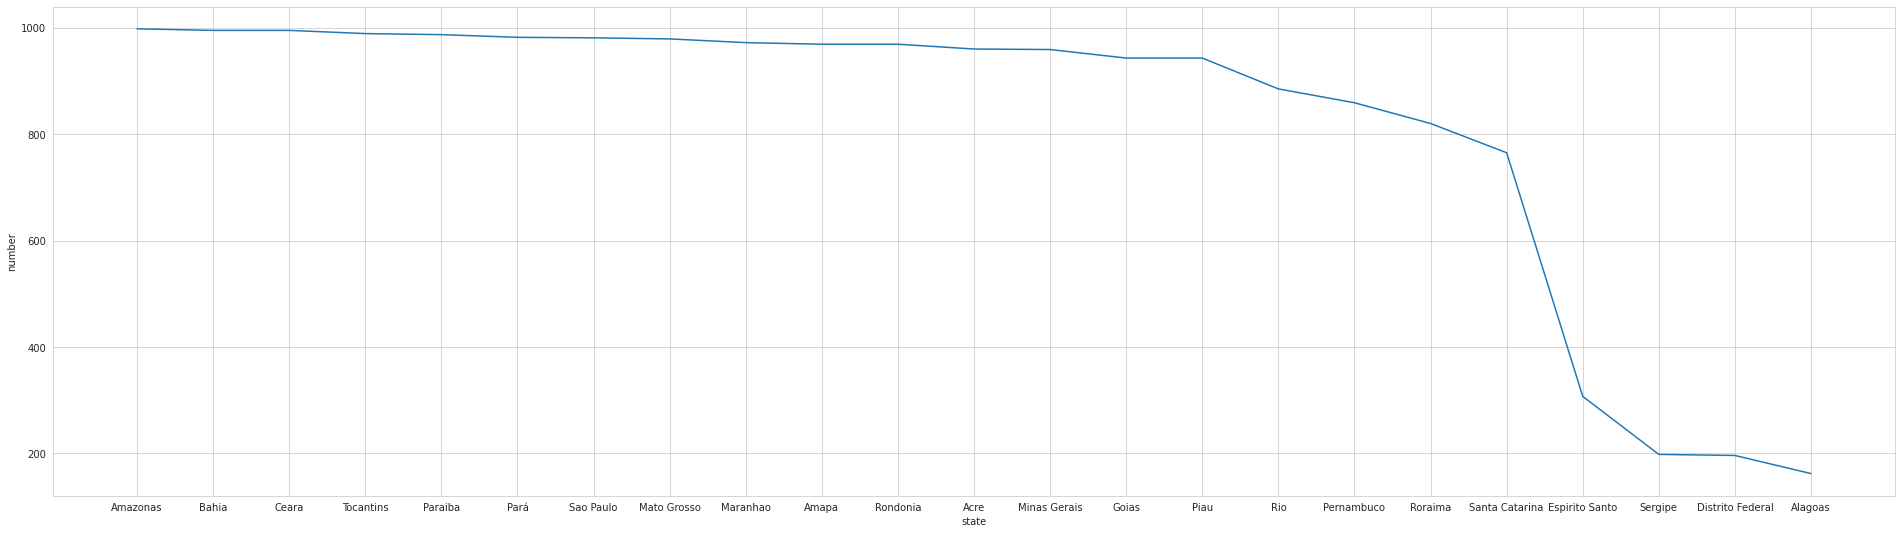

In [41]:
grouped_my_data = my_data.groupby('state')
plt.figure(figsize=(33,9))
grouped_my_data.agg({'number':'sum'}).sort_values(by = 'number', ascending=False).plot(figsize=(25,6))
#soma de queimadas por estados, agregando "number".


plt.figure(figsize=(33,9))
sns.lineplot('state', 'number', data = grouped_my_data.agg({'number':'max'}).sort_values(by = 'number', ascending=False))
#numero maximo de queimadas por estado, agregando "number".

In [42]:
grouped_my_data = my_data.groupby('year')
grouped_my_data.describe()

number                                                        
      count        mean         std  min   25%   50%     75%    max
year                                                               
1998  324.0   61.725309  148.995382  0.0  0.00   1.0   37.00  875.0
1999  324.0   82.929012  179.311733  0.0  2.00  14.0   58.50  982.0
2000  324.0   84.385802  179.294306  0.0  2.00  15.0   60.50  925.0
2001  324.0   89.679012  176.541689  0.0  2.00  11.5   76.00  979.0
2002  324.0  115.336420  200.965228  0.0  3.00  18.5  121.25  976.0
2003  324.0  131.904321  218.033443  0.0  3.00  27.0  153.50  977.0
2004  324.0  118.601852  203.325843  0.0  3.00  22.5  143.25  960.0
2005  324.0  107.975309  178.001738  0.0  4.00  25.0  137.00  948.0
2006  324.0  104.379630  191.076438  0.0  2.00  23.0   97.50  995.0
2007  324.0  101.904321  193.833592  0.0  2.75  15.0   95.25  982.0
2008  324.0   90.626543  171.848156  0.0  2.00  25.0   83.25  998.0
2009  324.0  120.691358  206.318933  0.0  3.00  29.0  125.75  989.0
2010  324.0  114.243827  184.009992  0.0  4.00  32.5  130.00  941.0
2011  324.0  106.848765  177.607471  0.0  3.00  31.0  119.50  974.0
2012  324.0  123.657407  200.535869  0.0  7.00  41.0  142.50  995.0
2013  324.0  108.425926  173.286384  0.0  4.75  36.5  121.25  956.0
2014  324.0  122.225309  189.860928  0.0  6.00  46.5  144.00  952.0
2015  324.0  127.111111  200.295664  0.0  6.00  44.5  147.25  960.0
2016  324.0  130.212963  203.291554  0.0  4.00  42.0  154.25  969.0
2017  298.0  123.030201  216.786437  0.0  4.00  31.5  118.50  987.0